# This is an implemention of K-Means algorithm. In this note book we will describe how K-Means works.

In [1164]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy.random import RandomState
from numpy.random import MT19937
from sklearn.datasets import make_blobs
from numpy import linalg as LA
import random

- Define number of clusters
- find ceneteroid radomly
- find distance between centeroids and points
- update ceteroids and assess distances again



In [46]:
class K_Means(object):
    def __init__(self, number_of_clusters, number_of_itr=20, random_stat=None, is3D=False, dist='norm2'):
        self.number_of_clusters = number_of_clusters
        self.is3D = is3D
        self.number_of_itr = number_of_itr        
        self.clusters = {}
        self.clusters_ctr = []     
        self.centroids = []
        self.random_stat=random_stat    
        self.dist = dist
  
    def norm2(self, point1, point2, is3d=False):
        if is3d:
            s = np.power(point1[0]-point2[0], 2) + np.power(point1[1]-point2[1], 2) + np.power(point1[2]-point2[2], 2)
        else:
            s = np.power(point1[0]-point2[0], 2) + np.power(point1[1]-point2[1], 2)
        return np.sqrt(s)

    def norm1(self, point1, point2, is3d=False):
        if is3d:
            return np.abs(point1[0]-point2[0]) + np.abs(point1[1]-point2[1]) + np.abs(point1[2]-point2[2])
        else:
            return np.abs(point1[0]-point2[0]) + np.abs(point1[1]-point2[1])
    
    def cosine_dist(self, point1, point2):
        return np.dot(np.array(point1), np.array(point2)) / (LA.norm(point1) * LA.norm(point2))
    
    def jaccard_dist(self, vector1, vector2):
        return 1 - (np.intersect1d(vector1, vector2) / np.union1d(vector1, vector2))
        
    def converge(self): 
        for idx in range(len(self.data[0])):
            if self.is3D:
                point = [self.data[0][idx], self.data[1][idx], self.data[2][idx]]
            else:
                point = [self.data[0][idx], self.data[1][idx]]
            min_distance = 0
            centeroid_id = 0 

            for i, centeroid in enumerate(self.centroids):
                if self.dist == 'norm2':
                    distance =self.norm2(point, centeroid, self.is3D)   
                elif self.dist == 'cos':
                    distance =self.cosine_dist(point, centeroid)
                else:
                    distance =self.norm1(point, centeroid, self.is3D)                
                    
                if min_distance == 0:                    
                    min_distance = distance
                    centeroid_id = i
                elif min_distance > distance:
                    min_distance = distance
                    centeroid_id = i
            
            self.clusters_ctr.append(centeroid_id)
            if centeroid_id in self.clusters:
                self.clusters[centeroid_id].append(point)
            else:
                self.clusters[centeroid_id] = [point]
    
    def fit(self, data):
        self.data = data
        self.define_centroids()
        for i in range(self.number_of_itr):
            if len(self.clusters) > 0:
                for key in self.clusters.keys():
                    cluster = self.clusters[key]
                    arr = np.array(cluster)
                    if self.is3D:
                        new_centroid = [arr[:, 0].mean(), arr[:, 1].mean(), arr[:, 2].mean()]
                    else:
                        new_centroid = [arr[:, 0].mean(), arr[:, 1].mean()]
                    self.centroids[key] = new_centroid

                self.clusters_ctr = []
                self.clusters = {}
                self.converge()
            else:
                self.converge()
            
            
    def define_centroids(self):
        rs = RandomState(self.random_stat)
        for i in range(self.number_of_clusters):
            if self.is3D:
                p=rs.standard_normal(3)
                point = [p[0], p[1], p[2]]
            else:
                p=rs.standard_normal(2)
                point = [p[0], p[1]]                
                
            self.centroids.append(point)
            
    def print_clusters(self):
        print(self.clusters)    
    
    def get_clusters(self):
        return self.clusters

    def get_centroids(self):
        return self.centroids
    
    def get_clusters_id(self):
        return self.clusters_ctr
    
    def inertia(self):
        self.inertia = 0
        for key in self.clusters.keys():
            centroid = self.centroids[key]
            points = self.clusters[key]            
            for point in points:
                self.inertia += self.norm2(centroid, point)
        return self.inertia
            

In [657]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")
%matplotlib inline
def display_cluster(X,km=[], cent=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(np.array(km[i])[:, 0],np.array(km[i])[:, 1],c = color[i],alpha = alpha,s=s)
            plt.scatter(cent[:, 0],cent[:, 1],c = color[i], marker = 'x', s = 100)

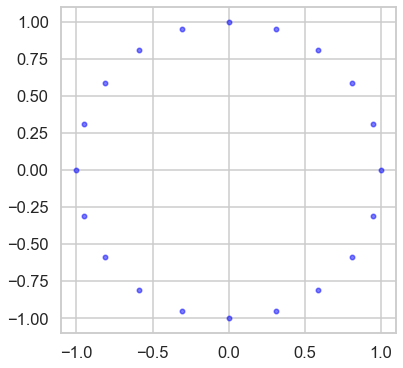

In [48]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

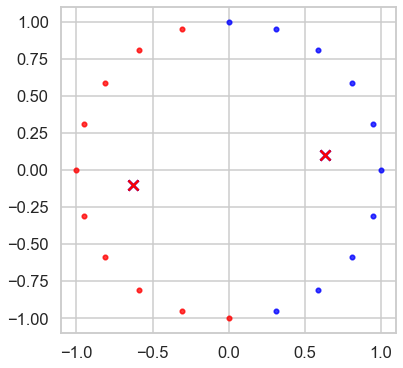

In [49]:
# norm2
km = K_Means(number_of_clusters=2, random_stat=10, number_of_itr=10)
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,2)

# norm1
km = K_Means(number_of_clusters=2, random_stat=10, number_of_itr=10, dist='norm1')
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,2)

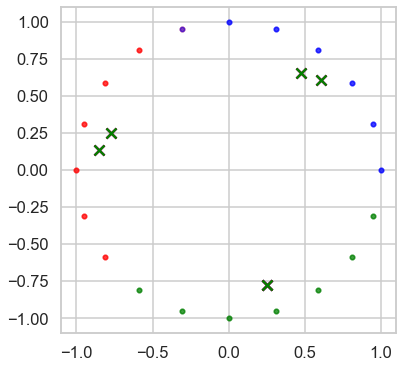

In [8]:
# norm2
km = K_Means(number_of_clusters=3, random_stat=10, number_of_itr=5)
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,3)

# norm1
km = K_Means(number_of_clusters=3, random_stat=10, number_of_itr=5, dist='norm1')
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,3)

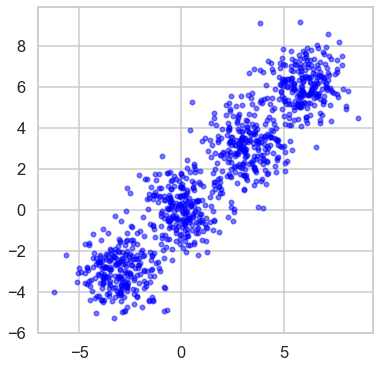

In [9]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

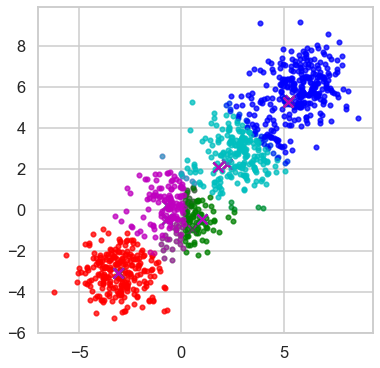

In [10]:
# norm2
km = K_Means(number_of_clusters=5, random_stat=10, number_of_itr=5)
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,5)

# norm1
km = K_Means(number_of_clusters=5, random_stat=10, number_of_itr=5, dist='norm1')
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,5)

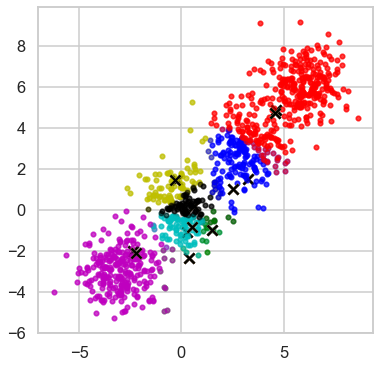

In [11]:
# norm2
km = K_Means(number_of_clusters=7, random_stat=0, number_of_itr=2)
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,7)

# norm1
km = K_Means(number_of_clusters=7, random_stat=0, number_of_itr=2, dist='norm1')
km.fit([X[:,0], X[:,1]])
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
display_cluster(X,clusters, cent,7)

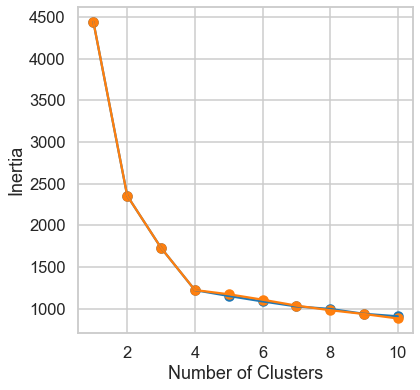

In [12]:
### BEGIN SOLUTION NORM2
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = K_Means(number_of_clusters=num_clusters, random_stat=10, number_of_itr=40)
    km.fit([X[:,0], X[:,1]])
    inertia.append(km.inertia())
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

### BEGIN SOLUTION NORM1
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = K_Means(number_of_clusters=num_clusters, random_stat=10, number_of_itr=40, dist='norm1')
    km.fit([X[:,0], X[:,1]])
    inertia.append(km.inertia())
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

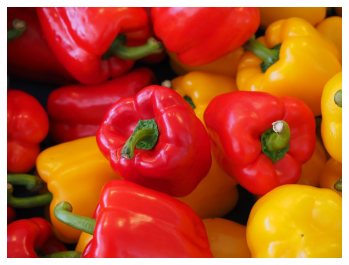

In [13]:
img = plt.imread('data/peppers.jpg')
plt.imshow(img)
plt.axis('off');

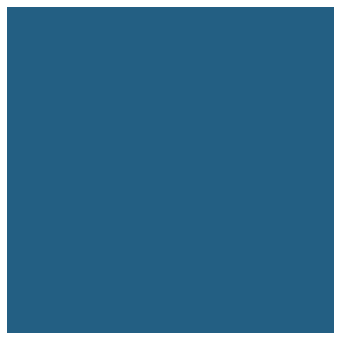

In [14]:
R = 35
G = 95
B = 131
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off');

In [15]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[15, 18, 25],
       [26, 16, 24],
       [42, 15, 22],
       [65, 16, 22],
       [85, 14, 22]], dtype=uint8)

In [16]:
img_flat.shape

(307200, 3)

In [17]:
img_flat[:,2].shape

(307200,)

In [18]:
km = K_Means(number_of_clusters=8, random_stat=None, number_of_itr=20, is3D=True)
km.fit([img_flat[:,0], img_flat[:,1], img_flat[:, 2]])

In [19]:
img_flat2 = img_flat.copy()

In [20]:
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
cluster_list = np.array(km.get_clusters_id())

In [21]:
labels=np.array(list(clusters.keys()))

In [22]:
for i in np.unique(cluster_list):
    img_flat2[cluster_list==i,:] = cent[i]

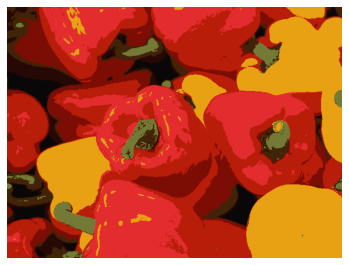

In [23]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

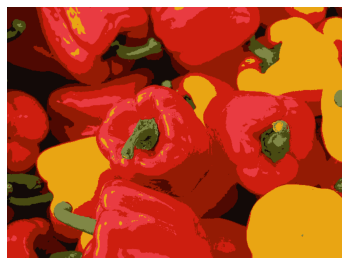

In [24]:
# norm 1
km = K_Means(number_of_clusters=8, random_stat=None, number_of_itr=20, is3D=True, dist='norm1')
km.fit([img_flat[:,0], img_flat[:,1], img_flat[:, 2]])
img_flat2 = img_flat.copy()
clusters=km.get_clusters()
cent=np.array(km.get_centroids())
cluster_list = np.array(km.get_clusters_id())
labels=np.array(list(clusters.keys()))
for i in np.unique(cluster_list):
    img_flat2[cluster_list==i,:] = cent[i]
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

In [25]:
### BEGIN SOLUTION
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    km = K_Means(number_of_clusters=k, random_stat=0, is3D=True)
    km.fit([img_flat[:,0], img_flat[:,1], img_flat[:, 2]])
    img_flat2 = img_flat.copy()
    
    clusters=km.get_clusters()
    cent=np.array(km.get_centroids())
    cluster_list = np.array(km.get_clusters_id())
    labels=np.array(list(clusters.keys()))
    
    # loops for each cluster center
    for i in np.unique(cluster_list):
        img_flat2[cluster_list==i,:] = cent[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, km.inertia()
### END SOLUTION

In [26]:
### BEGIN SOLUTION
k_vals = list(range(2,10,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_l ist.append(img2)
    inertia.append(ine)  

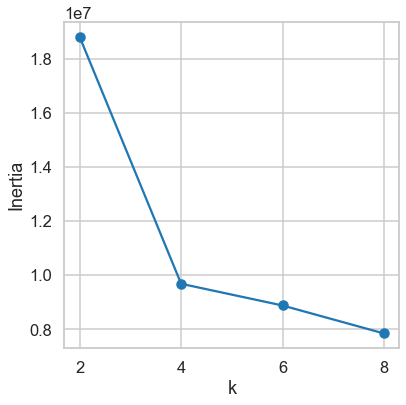

In [27]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');
### END SOLUTION

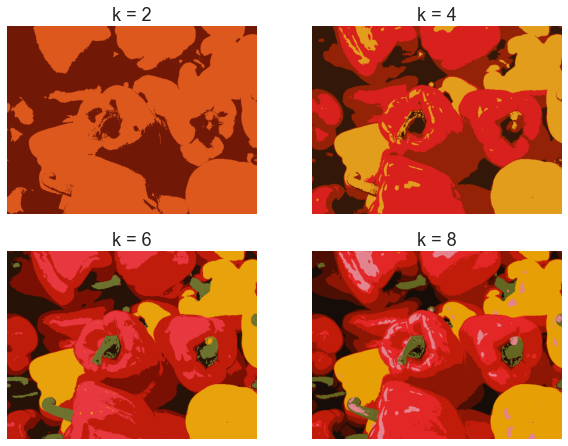

In [28]:
### BEGIN SOLUTION
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');
### END SOLUTION